In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from scipy.stats import probplot

In [5]:
import pylab

In [6]:
df=pd.read_csv("013 IndexE8.csv")

In [7]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


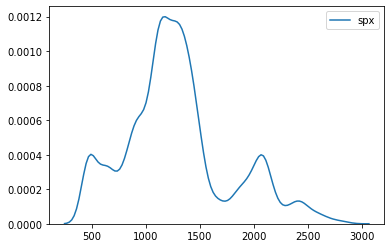

In [8]:
sns.kdeplot(df['spx'])

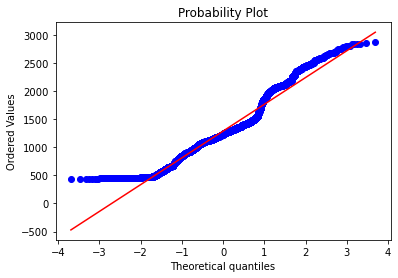

In [8]:
pr=probplot(df['spx'],plot=pylab)
pylab.show()

In [14]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-07-01,469.90,2224.95,3445.98,18124.01
1,1994-10-01,475.27,2225.00,3440.58,18443.44
2,1994-11-01,474.13,2228.10,3413.77,18485.25
3,1994-12-01,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [6]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)

In [186]:
df['date'].describe()

count           6269
unique          6269
top       30/08/1995
freq               1
Name: date, dtype: object

In [8]:
df.set_index('date',inplace=True)

In [38]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


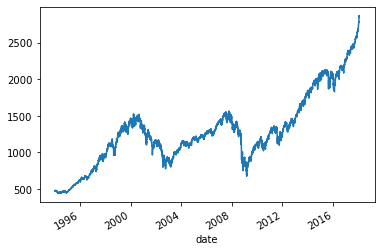

In [39]:
df['spx'].plot()

In [9]:
df=df.asfreq('b')

In [41]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [46]:
df.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [10]:
from feature_engine.missing_data_imputers import MeanMedianImputer

In [11]:
mn=MeanMedianImputer(imputation_method='mean',variables=['spx','dax','ftse','nikkei'])

In [12]:
df=mn.fit_transform(df)

In [13]:
del df['dax'],df['ftse'],df['nikkei']

In [14]:
df.describe()

,spx
count,6277.000000
mean,1288.127542
std,487.275611
min,438.920000
25%,993.055652
50%,1233.980000
75%,1459.684218
max,2872.867839


In [15]:
df['spx'].mean()

1288.127542081512

In [16]:
wn=np.random.normal(loc=df['spx'].mean(),scale=df['spx'].std(),size=len(df['spx']))

In [17]:
df['wn']=wn

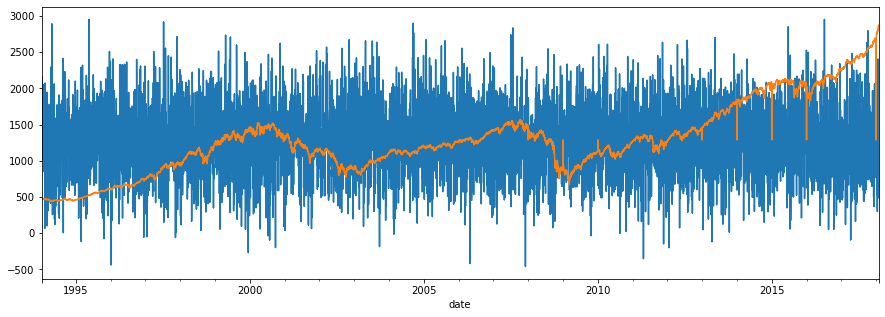

In [18]:
df['wn'].plot(figsize=(15,5))
df['spx'].plot(figsize=(15,5))

In [29]:
rw=pd.read_csv('025 RandWalk.csv')

In [30]:
rw['date']=pd.to_datetime(rw['date'])

In [31]:
rw.set_index('date',inplace=True)

In [35]:
rw.head()

,price
date,
1994-07-01,1122.139662
1994-08-01,1135.238562
1994-09-01,1109.897831
1994-10-01,1080.347860
1994-11-01,1082.095245


In [33]:
import statsmodels.tsa.stattools as sts

In [36]:
sts.adfuller(rw['price'])

(-1.51989469011843,
 0.523647772069419,
 0,
 7028,
 {'1%': -3.4312808039348894,
  '5%': -2.8619513408164483,
  '10%': -2.566988952715846},
 62547.63026051087)

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
rw['price']=rw['price'].to_frame()

In [47]:
rw=rw.asfreq('b')

In [52]:
sd=seasonal_decompose(rw['price'],model='additive')

In [49]:
mn=MeanMedianImputer(imputation_method='mean',variables='price')

In [51]:
rw=mn.fit_transform(rw)

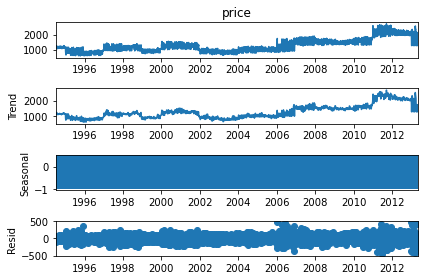

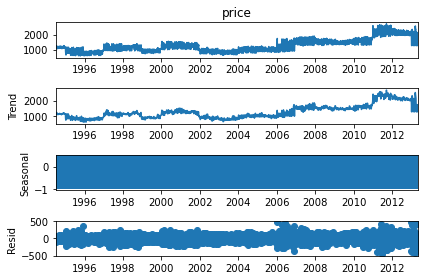

In [53]:
sd.plot()

In [7]:
miles=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv')

In [8]:
miles.head()

,Month,MilesMM
0,1963-01,6827
1,1963-02,6178
2,1963-03,7084
3,1963-04,8162
4,1963-05,8462


In [9]:
miles['Month']=pd.to_datetime(miles['Month'],dayfirst=True)

In [10]:
miles.index=miles['Month']

In [11]:
miles.drop('Month',inplace=True,axis=1)

In [111]:
zoom_miles=miles[(miles['Month']>= '1963-01-01')&(miles['Month']<='1963-02-01')]

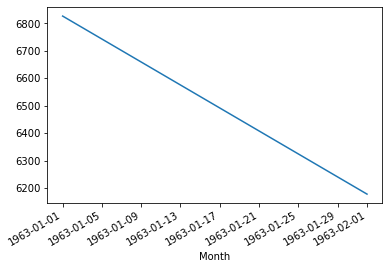

In [112]:
zoom_miles['MilesMM'].plot()

In [14]:
miles['lag1']=miles['MilesMM'].shift(1)

In [15]:
miles.head()

,MilesMM,lag1
Month,,
1963-01-01,6827,NaN
1963-02-01,6178,6827.0
1963-03-01,7084,6178.0
1963-04-01,8162,7084.0
1963-05-01,8462,8162.0


In [16]:
temp=pd.read_csv('daily-min-temperatures.csv',parse_dates=[0])

In [17]:
temp.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [20]:
temp.shape

(3650, 2)

In [21]:
train=temp.shape[0]*0.8
test=3650-temp.shape[0]*0.8

In [24]:
train=temp.iloc[0:2920,:]

In [25]:
train.shape

(2920, 2)

In [28]:
test=temp.iloc[2920:,:]

In [29]:
test.shape

(730, 2)

In [30]:
train.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [32]:
temp.shape[0]-7

3643

In [33]:
#Naive model
temp.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [34]:
temp['prev']=temp['Temp'].shift(1)

In [86]:
len(temp)

3650

In [62]:
train,test=temp.iloc[1:3640,[1,2]], temp.iloc[3640:,[1,2]]

In [39]:
train.head()

,Temp,prev
1,17.9,20.7
2,18.8,17.9
3,14.6,18.8
4,15.8,14.6
5,15.8,15.8


In [63]:
train_X,train_y=train['prev'],train['Temp']
test_X,test_y=test['prev'],test['Temp']

In [42]:
pred=test_X.copy()

In [43]:
test_X

3630    11.1
3631    14.0
3632    11.4
3633    12.5
3634    13.4
3635    13.6
3636    13.9
3637    17.2
3638    14.7
3639    15.4
3640    13.1
3641    13.2
3642    13.9
3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: prev, dtype: float64

In [65]:
test_y

3640    13.2
3641    13.9
3642    10.0
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [99]:
from sklearn.metrics import mean_squared_error

In [46]:
mse=mean_squared_error(test_y,pred)

In [47]:
mse

3.9955

# auto regression model

In [152]:
X=temp

In [153]:
X=pd.read_csv('daily-min-temperatures.csv',parse_dates=True)

In [154]:
X.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [155]:
X.shape

(3650, 2)

In [156]:
X.shape

(3650, 2)

In [157]:
X.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [106]:
from statsmodels.tsa.stattools import adfuller

In [158]:
#test for Stationarity
adfuller(X.Temp)

(-4.444804924611691,
 0.00024708263003610866,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [159]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

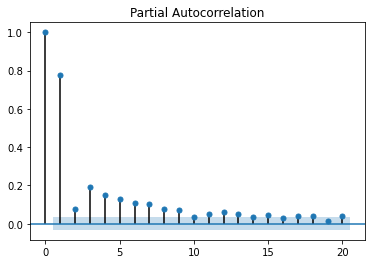

In [160]:
pacf=plot_pacf(X.Temp,lags=20)

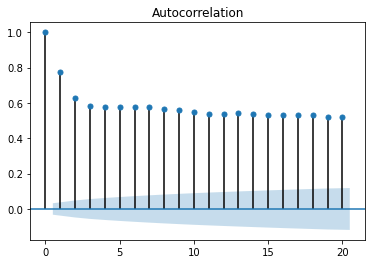

In [161]:
acf=plot_acf(X.Temp,lags=20)

In [113]:
from statsmodels.tsa.ar_model import AutoReg

In [162]:
train=X.iloc[:len(X)-7,1]
test=X.iloc[len(X)-7:,1]

In [165]:
train.head().to_frame()

,Temp
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [169]:
test.to_frame()

,Temp
3643,12.9
3644,14.6
3645,14.0
3646,13.6
3647,13.5
3648,15.7
3649,13.0


In [170]:
len(X)

3650

In [171]:
model=AutoReg(train,lags=13).fit()

In [172]:
pre=model.predict(start=len(train),end=len(X)-1)

In [173]:
mean_squared_error(test,pre)

2.3856618571001045

In [174]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Temp   No. Observations:                 3643
Model:                    AutoReg(13)   Log Likelihood               -8352.772
Method:               Conditional MLE   S.D. of innovations              2.416
Date:                Tue, 01 Dec 2020   AIC                              1.772
Time:                        13:57:23   BIC                              1.798
Sample:                            13   HQIC                             1.782
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7919      0.143      5.527      0.000       0.511       1.073
Temp.L1        0.6024      0.017     36.337      0.000       0.570       0.635
Temp.L2       -0.0861      0.019     -4.451      0.0

In [176]:
#future values
future=model.predict(start=351,end=357,dynamic=False)

In [179]:
mean_squared_error(future,test)

1.8990264469199407

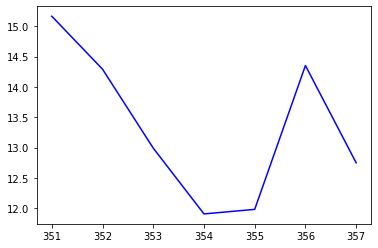

In [184]:
plt.plot(future,color='blue')

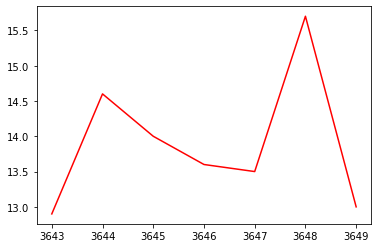

In [187]:
plt.plot(test,color='red')

# arma model

In [353]:
arma=pd.read_csv('daily-min-temperatures.csv',parse_dates=True)

In [354]:
len(arma)

3650

In [355]:
arma['date']=pd.to_datetime(arma['Date'])

In [356]:
arma.index=arma['date']

In [62]:
from statsmodels.tsa.stattools import adfuller

In [358]:
adfuller(arma['Temp'])

(-4.444804924611691,
 0.00024708263003610866,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [359]:
arma.head()

,Date,Temp,date
date,,,
1981-01-01,1981-01-01,20.7,1981-01-01
1981-01-02,1981-01-02,17.9,1981-01-02
1981-01-03,1981-01-03,18.8,1981-01-03
1981-01-04,1981-01-04,14.6,1981-01-04
1981-01-05,1981-01-05,15.8,1981-01-05


In [360]:
arma.drop(['Date','date'],axis=1,inplace=True)

In [361]:
arma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [63]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [64]:
from statsmodels.tsa.arima_model import ARMA

In [366]:
arma.head()

,Temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [367]:
train=arma.iloc[:len(arma)-10,:]
test=arma.iloc[len(arma)-10:,:]

In [377]:
test.head()

,Temp
date,
1990-12-22,13.2
1990-12-23,13.9
1990-12-24,10.0
1990-12-25,12.9
1990-12-26,14.6


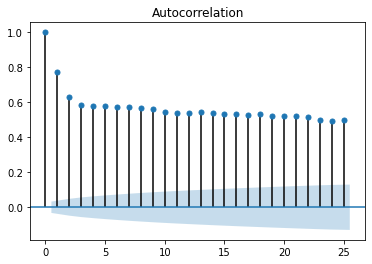

In [371]:
acf=plot_acf(arma.Temp,lags=25)

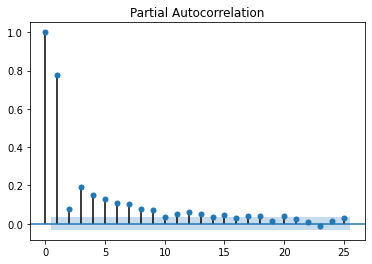

In [372]:
pacf=plot_pacf(arma.Temp,lags=25)

In [418]:
model=ARMA(train,order=(4,2)).fit()

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [419]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                   Temp   No. Observations:                 3640
Model:                     ARMA(4, 2)   Log Likelihood               -8362.351
Method:                       css-mle   S.D. of innovations              2.406
Date:                Fri, 04 Dec 2020   AIC                          16740.703
Time:                        13:23:06   BIC                          16790.300
Sample:                             0   HQIC                         16758.368
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4811      0.852     13.469      0.000       9.810      13.152
ar.L1.Temp     0.5975      0.205      2.909      0.004       0.195       1.000
ar.L2.Temp     0.6975      0.305      2.287      0.0

In [391]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [422]:
model.resid

date
1981-01-01    9.218946
1981-01-02   -0.793730
1981-01-03    1.958381
1981-01-04   -3.452322
1981-01-05    0.615052
                ...   
1990-12-17    0.265164
1990-12-18    3.431776
1990-12-19   -0.993695
1990-12-20    1.497996
1990-12-21   -1.643572
Length: 3640, dtype: float64

In [420]:
preds=model.predict(start=1, end=10)

In [424]:
preds,test

(date
 1981-01-02    18.693730
 1981-01-03    16.841619
 1981-01-04    18.052322
 1981-01-05    15.184948
 1981-01-06    16.442976
 1981-01-07    16.111484
 1981-01-08    16.102118
 1981-01-09    16.983486
 1981-01-10    19.541714
 1981-01-11    18.059381
 dtype: float64,
             Temp
 date            
 1990-12-22  13.2
 1990-12-23  13.9
 1990-12-24  10.0
 1990-12-25  12.9
 1990-12-26  14.6
 1990-12-27  14.0
 1990-12-28  13.6
 1990-12-29  13.5
 1990-12-30  15.7
 1990-12-31  13.0)

In [421]:
mean_squared_error(preds,test)

17.550137023009093

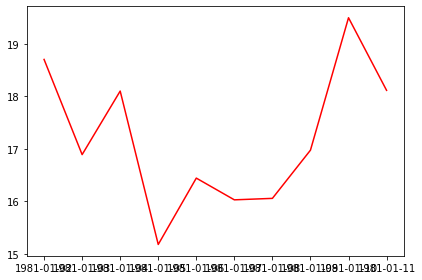

In [385]:
plt.plot(preds,color='red')
plt.tight_layout()

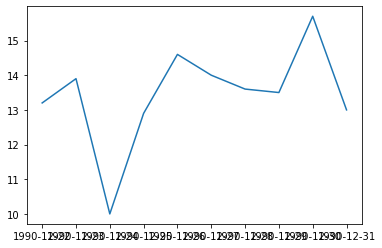

In [386]:
plt.plot(test)

# arima model

In [224]:
arima=pd.read_csv("013 IndexE8.csv")

In [225]:
arima.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [218]:
arima.set_index('date',inplace=True)

In [219]:
arima=arima.asfreq('b')

In [204]:
arima.index=pd.to_datetime(arima.index,dayfirst=True)

In [454]:
arima=arima.fillna(method='ffill').fillna(method='bfill')

In [43]:
arima.head()

,spx,dax,ftse,nikkei
date,,,,
1994-07-01,NaN,NaN,NaN,NaN
1994-07-04,NaN,NaN,NaN,NaN
1994-07-05,NaN,NaN,NaN,NaN
1994-07-06,NaN,NaN,NaN,NaN
1994-07-07,NaN,NaN,NaN,NaN


In [40]:
from feature_engine.missing_data_imputers import MeanMedianImputer

In [41]:
mn=MeanMedianImputer(variables=['spx','dax','ftse','nikkei'])

In [42]:
arima=mn.fit_transform(arima)

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\numpy\lib\nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [220]:
arima['market_prices']=arima.ftse

In [221]:
arima.head()

,spx,dax,ftse,nikkei,market_prices
date,,,,,
1994-07-01,NaN,NaN,NaN,NaN,NaN
1994-07-04,NaN,NaN,NaN,NaN,NaN
1994-07-05,NaN,NaN,NaN,NaN,NaN
1994-07-06,NaN,NaN,NaN,NaN,NaN
1994-07-07,NaN,NaN,NaN,NaN,NaN


In [222]:
arima.drop(['spx','dax','ftse','nikkei'],axis=1,inplace=True)

In [207]:
arima=arima.asfreq('b')

In [223]:
arima.isnull().sum()

market_prices    6152
dtype: int64

In [209]:
arima=arima.fillna(method='ffill')

In [215]:
arima

,market_prices
date,
07/01/1994,3445.98


In [214]:
adfuller(arima.market_prices) 

ValueError: sample size is too short to use selected regression component

In [476]:
arima['first_diff']=arima['market_prices']-arima['market_prices'].shift(1)

In [486]:
arima['second_diff']=arima['market_prices']-arima['market_prices'].shift(2)

In [487]:
adfuller(arima['second_diff'].dropna())

(-15.012589384046482,
 1.0501975480957515e-27,
 34,
 6240,
 {'1%': -3.4313983961705303,
  '5%': -2.8620032980054413,
  '10%': -2.567016610602605},
 68619.31206356778)

In [490]:
sea=seasonal_decompose(arima['second_diff'].dropna())

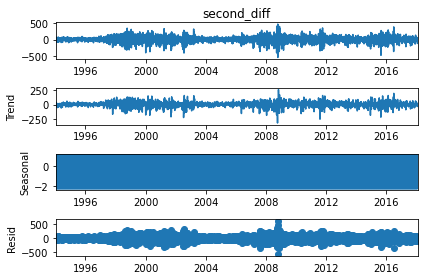

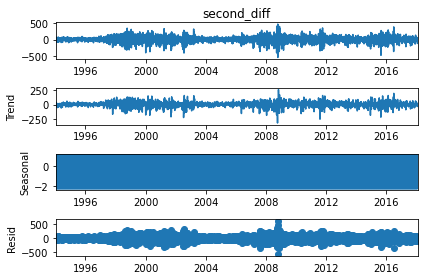

In [491]:
sea.plot()

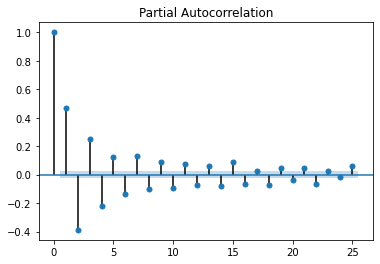

In [496]:
a=plot_pacf(arima['second_diff'].dropna(),lags=25)

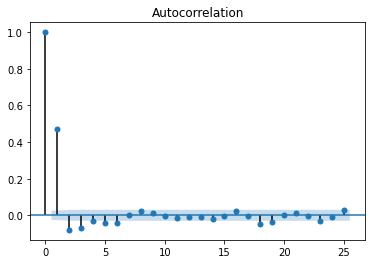

In [497]:
b=plot_acf(arima['second_diff'].dropna(),lags=25)

In [86]:
from statsmodels.tsa.arima_model import ARIMA

In [174]:
train=arima.iloc[:len(arima)-500,0]
test=arima.iloc[len(arima)-500:,0]

In [122]:
arima

,market_prices
date,
1994-01-07,3445.980000
1994-01-10,3440.580000
1994-01-11,3413.770000
1994-01-12,3372.020000
1994-01-13,3360.010000
...,...
2018-01-23,7731.827774
2018-01-24,7643.428966
2018-01-25,7615.839954


In [98]:
test.shape

(15, 1)

In [144]:
test

,market_prices
date,
2018-01-09,7731.020101
2018-01-10,7748.511845
2018-01-11,7762.941268
2018-01-12,7778.637689
2018-01-15,7769.139189
2018-01-16,7755.931441
2018-01-17,7725.432076
2018-01-18,7700.963484
2018-01-19,7730.787919


In [175]:
model=ARIMA(train,order=(3,1,3)).fit()

In [176]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.market_prices   No. Observations:                 5776
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -31749.180
Method:                       css-mle   S.D. of innovations             59.016
Date:                Sun, 06 Dec 2020   AIC                          63514.360
Time:                        23:40:11   BIC                          63567.652
Sample:                    01-10-1994   HQIC                         63532.902
                         - 02-29-2016                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4554      0.643      0.709      0.479      -0.804       1.715
ar.L1.D.market_prices    -0.1319      0.116     -1.140      0.254      -0.359       0.095
ar.L2.D.

In [75]:
import itertools

In [76]:
p=range(3)
d=range(3)
q=range(3)

In [77]:
from itertools import product,permutations

In [78]:
from itertools import combinations

In [79]:
product(p,d,q)

In [80]:
pdq=[i for i in product(p,d,q)]

In [81]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [135]:
from pmdarima import auto_arima

In [178]:
tist=auto_arima(train,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=63526.090, Time=8.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=63546.605, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=63547.218, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=63547.074, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=63544.952, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=63524.226, Time=4.87 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=63535.957, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=63527.020, Time=4.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=63518.124, Time=4.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=63519.902, Time=1.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=63520.288, Time=3.91 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=63520.135, Time=5.62 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=63519.919, Time=1.58 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=63516.815, Time=16.29 sec
 ARIMA(3,1,4)(0,0,

In [141]:
print(tist.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6277
Model:               SARIMAX(3, 1, 0)   Log Likelihood              -34413.773
Date:                Sun, 06 Dec 2020   AIC                          68835.547
Time:                        22:44:04   BIC                          68862.525
Sample:                             0   HQIC                         68844.894
                               - 6277                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0122      0.009     -1.389      0.165      -0.029       0.005
ar.L2         -0.0482      0.008     -5.868      0.000      -0.064      -0.032
ar.L3         -0.0544      0.008     -6.758      0.0

In [182]:
arima['preds']=model.predict(start=1,end=499)
arima['preds']

date
1994-01-07         NaN
1994-01-10    0.455350
1994-01-11    0.533907
1994-01-12    1.140273
1994-01-13    2.840037
                ...   
2018-01-23         NaN
2018-01-24         NaN
2018-01-25         NaN
2018-01-26         NaN
2018-01-29         NaN
Freq: B, Name: preds, Length: 6277, dtype: float64

In [180]:
model.resid

date
1994-01-10     -5.855350
1994-01-11    -27.343907
1994-01-12    -42.890273
1994-01-13    -14.850037
1994-01-14     36.468573
                 ...    
2016-02-23    -83.083732
2016-02-24    -87.574385
2016-02-25    154.420655
2016-02-26     68.590377
2016-02-29      9.595749
Freq: B, Length: 5776, dtype: float64

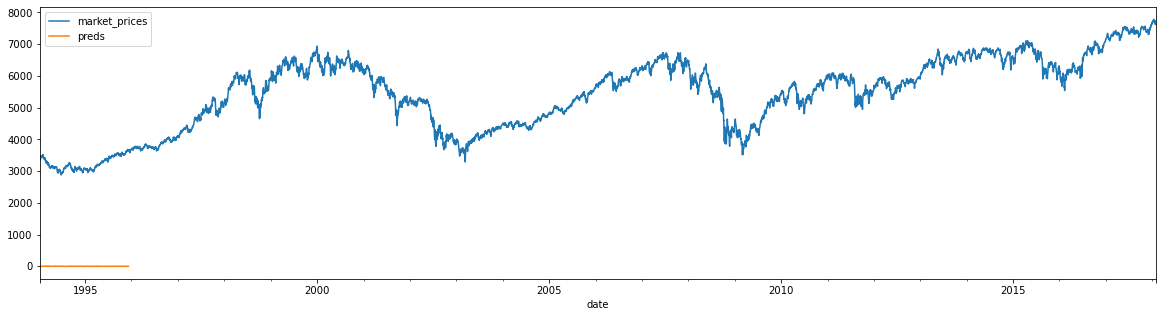

In [181]:
arima[['market_prices','preds']].plot(figsize=(20,5))

In [199]:
adfuller(arima)

(-1.5977036080775584,
 0.4847469321167524,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68473.97870115061)

In [184]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [185]:
dec=seasonal_decompose(arima['market_prices'],model='multiplicative',extrapolate_trend=True)

In [192]:
arima.values[:,0]

array([3445.98    , 3440.58    , 3413.77    , ..., 7615.839954,
       7665.541292, 7671.5333  ])

In [194]:
arima=arima.values[:,0]/dec.seasonal

In [195]:
arima

date
1994-01-07    3445.752937
1994-01-10    3440.646564
1994-01-11    3412.892015
1994-01-12    3372.422972
1994-01-13    3360.629415
                 ...     
2018-01-23    7729.839231
2018-01-24    7644.342391
2018-01-25    7617.243927
2018-01-26    7665.036193
2018-01-29    7671.681719
Freq: B, Name: seasonal, Length: 6277, dtype: float64

In [200]:
arima

date
1994-01-07    3445.752937
1994-01-10    3440.646564
1994-01-11    3412.892015
1994-01-12    3372.422972
1994-01-13    3360.629415
                 ...     
2018-01-23    7729.839231
2018-01-24    7644.342391
2018-01-25    7617.243927
2018-01-26    7665.036193
2018-01-29    7671.681719
Freq: B, Name: seasonal, Length: 6277, dtype: float64

# Sarima model

In [453]:
milk=pd.read_csv('monthly-milk-production-pounds-p.csv',parse_dates=True)

In [454]:
milk.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [455]:
milk=milk.rename(columns={'Monthly milk production: pounds per cow. Jan 62 ? Dec 75': 'production'})

In [456]:
milk.tail()

,Month,production
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [457]:
milk.drop(168,axis=0,inplace=True)

In [458]:
milk['Month']=pd.to_datetime(milk['Month'])

In [459]:
adfuller(milk['production'])

(-1.3038115874221312,
 0.6274267086030308,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [460]:
milk['first_diff']=milk['production']-milk['production'].shift(1)

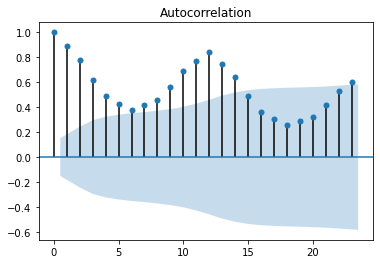

In [461]:
acf=plot_acf(milk['production'].dropna())

In [462]:
adfuller(milk.first_diff.dropna())

(-3.0549955586530615,
 0.03006800400178639,
 14,
 152,
 {'1%': -3.474120870218417,
  '5%': -2.880749791423677,
  '10%': -2.5770126333102494},
 1107.6745114331075)

In [463]:
from pmdarima import auto_arima

In [464]:
milk.set_index('Month',inplace=True)

In [465]:
sea=seasonal_decompose(milk['first_diff'].dropna())

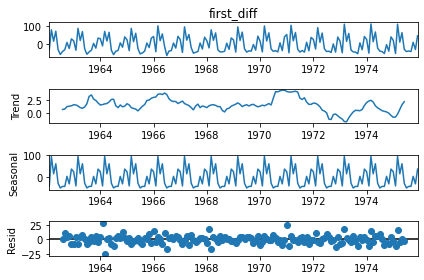

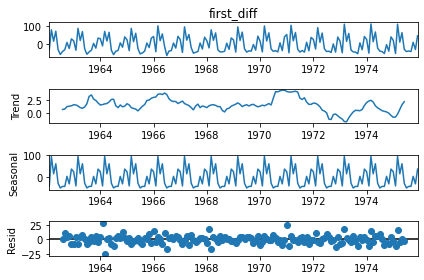

In [466]:
sea.plot()

In [467]:
adfuller(milk['production'])

(-1.3038115874221312,
 0.6274267086030308,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

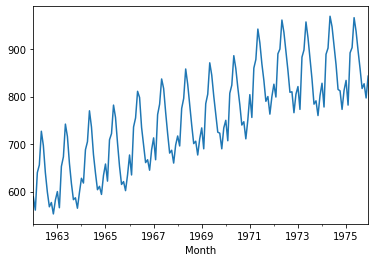

In [468]:
milk['production'].plot()

In [469]:
milk['seasonal_diff']=milk['production']-milk['production'].shift(12)

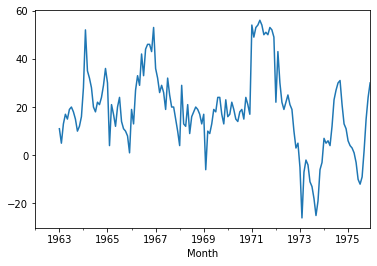

In [470]:
milk['seasonal_diff'].plot()

In [471]:
milk['first_diff']=milk['production']-milk['production'].shift(1)

In [472]:
milk['second_diff']=milk['production']-milk['production'].shift(2)

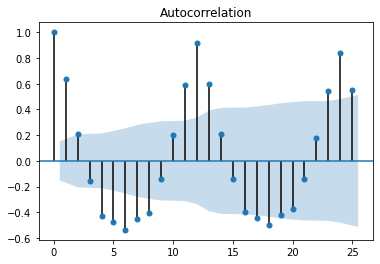

In [348]:
ac=plot_acf(milk['second_diff'].dropna(),lags=25)

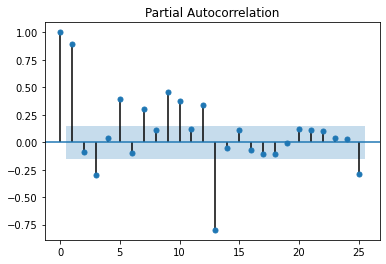

In [349]:
pc=plot_pacf(milk['production'].dropna(),lags=25)

In [473]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [474]:
milk['production'].shape

(168,)

In [475]:
train

0      589.0
1      561.0
2      640.0
3      656.0
4      727.0
       ...  
133    773.0
134    883.0
135    898.0
136    957.0
137    924.0
Name: production, Length: 138, dtype: float64

In [476]:
train=milk.production.iloc[:138]
test=milk.production.iloc[138:]

In [477]:
model=SARIMAX(train,order=(1,1,0
                          ),seasonal_order=(1,1,1,12)).fit()

In [478]:
milk['forecast']=model.predict(start=138,end=168)

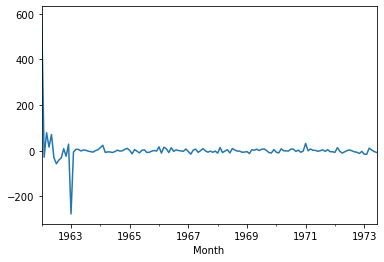

In [479]:
model.resid.plot()

In [480]:
mean_squared_error(pred,test)

52519.041768150644

In [481]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           production   No. Observations:                  138
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -432.309
Date:                              Thu, 10 Dec 2020   AIC                            872.618
Time:                                      03:21:33   BIC                            883.932
Sample:                                  01-01-1962   HQIC                           877.214
                                       - 06-01-1973                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2836      0.092     -3.098      0.002      -0.463      -0.104
ar.S.L12      -0.0561      0.130     -0.432      0.666      -0.311       0.199
ma.S.L12      -0.5869      0.130     -4.514      0.000      -0.842      -0.332
sigma2        56.3393      5.948      9.472      0.000      44.681      67.997
===================================================================================
Ljung-Box (Q):                       22.53   Jarque-Bera (JB):                37.28
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             0.84
Prob(H) (two-sided):                  0.67   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [482]:
auto_arima(milk.production,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1717.505, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1751.544, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1753.460, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1753.488, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1749.732, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1730.211, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1745.253, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1754.812, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1715.647, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1728.325, Time=0

ARIMA(order=(2, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

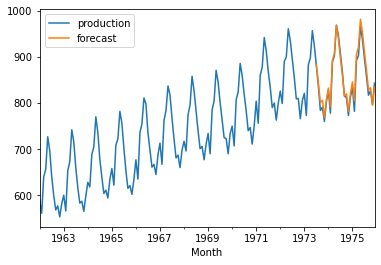

In [483]:
milk[['production','forecast']].plot()

In [484]:
from pandas.tseries.offsets import DateOffset

In [485]:
milk

,production,first_diff,seasonal_diff,second_diff,forecast
Month,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,NaN,51.0,NaN
1962-04-01,656.0,16.0,NaN,95.0,NaN
1962-05-01,727.0,71.0,NaN,87.0,NaN
...,...,...,...,...,...
1975-08-01,858.0,-38.0,-9.0,-79.0,872.110560
1975-09-01,817.0,-41.0,2.0,-79.0,828.655984
1975-10-01,827.0,10.0,15.0,-31.0,833.102302


In [486]:
fut_forecast=[milk.index[-1] + DateOffset(months=x) for x in range(1,37) ]

In [487]:
fut_forecast[-1]

Timestamp('1978-12-01 00:00:00')

In [488]:
fut_forecast=pd.DataFrame(index=fut_forecast,columns=milk.columns)

In [489]:
milk=pd.concat([milk,fut_forecast])

In [499]:
milk.tail()

,production,first_diff,seasonal_diff,second_diff,forecast,tre_forecast
1978-08-01,NaN,NaN,NaN,NaN,NaN,911.801689
1978-09-01,NaN,NaN,NaN,NaN,NaN,868.346407
1978-10-01,NaN,NaN,NaN,NaN,NaN,872.792189
1978-11-01,NaN,NaN,NaN,NaN,NaN,834.949663
1978-12-01,NaN,NaN,NaN,NaN,NaN,873.698261


In [494]:
milk['tre_forecast']=model.predict(start=168,end=204)

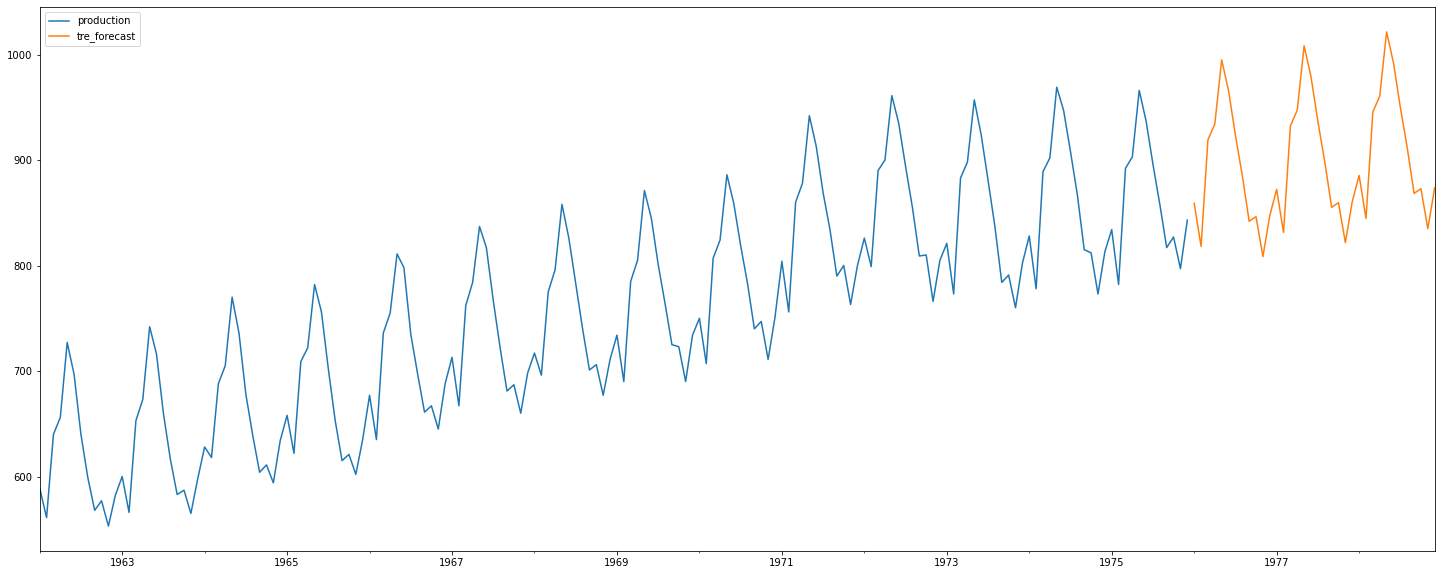

In [502]:
milk[['production','tre_forecast']].plot(figsize=(25,10))

# fbprophet algorithm

In [5]:
import fbprophet

In [6]:
df=pd.read_csv('monthly-milk-production-pounds-p.csv')

In [7]:
df.drop(168,inplace=True)

In [8]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [9]:
df.columns=['ds','y']

<AxesSubplot:>

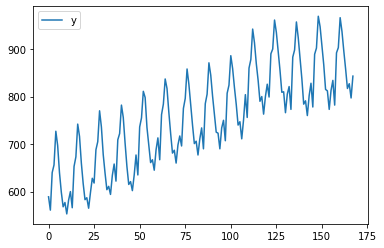

In [10]:
df.plot()

In [11]:
from fbprophet import Prophet

In [12]:
df['y']=df['y']-df['y'].shift(1)

In [13]:
df.head()

,ds,y
0,1962-01,NaN
1,1962-02,-28.0
2,1962-03,79.0
3,1962-04,16.0
4,1962-05,71.0


In [14]:
model=Prophet()

In [15]:
model

In [16]:
model.seasonalities

OrderedDict()

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
import pystan